# Introduction
HR Analytics helps human resources to interpret data, find out the trends & help take required steps to keep the organization running smoothly & profitably. It has helped human resources to be more active and gain involved role in an organization's planning & objectives. This notebook uses the IBM dataset to predict the attrition as well as study the underlying factors & interpret them through visualizations. 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.size

51450

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
numeric_columns = list(df.select_dtypes(include=np.number).columns)
categorical_columns = list(df.select_dtypes(include="object").columns)

In [10]:
df[numeric_columns].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df[numeric_columns].describe().T.style.bar(['mean','std'])

,count,mean,std,min,25%,50%,75%,max
Age,1470.000000,36.923810,9.135373,18.000000,30.000000,36.000000,43.000000,60.000000
DailyRate,1470.000000,802.485714,403.509100,102.000000,465.000000,802.000000,1157.000000,1499.000000
DistanceFromHome,1470.000000,9.192517,8.106864,1.000000,2.000000,7.000000,14.000000,29.000000
Education,1470.000000,2.912925,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EmployeeCount,1470.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,1470.000000,1024.865306,602.024335,1.000000,491.250000,1020.500000,1555.750000,2068.000000
EnvironmentSatisfaction,1470.000000,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
HourlyRate,1470.000000,65.891156,20.329428,30.000000,48.000000,66.000000,83.750000,100.000000
JobInvolvement,1470.000000,2.729932,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,1470.000000,2.063946,1.106940,1.000000,1.000000,2.000000,3.000000,5.000000


In [12]:
df[categorical_columns].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [13]:
df[categorical_columns].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [14]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x28533b55430>,
 [Text(-1.4865598586092734, 0.8247058789481118, 'No'),
  Text(1.530282207391899, -0.8489619342112916, 'Yes')],
 [Text(-0.830724626869888, 0.4608650500004153, '83.9%'),
  Text(0.8744469756525135, -0.48512110526359514, '16.1%')])

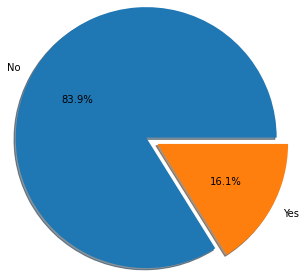

In [15]:
r = df.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'],radius=1.5, autopct='%1.1f%%', shadow=True)

# Statistical Analysis:
Statistically we can check whether all the independent variables has significant effect on target variable.

In [16]:
# Hypothesis Testing

df.groupby(by=['Attrition']).mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [17]:
# convert Categorical to continuous using LabelEncoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_columns:
    df[i] = le.fit_transform(df[i])

In [18]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
from scipy.stats import chi2_contingency,ttest_ind

In [20]:
# perform T-Sample ttest.
# What is t-test used for?
# A t-test is a type of inferential statistic used to determine 
# if there is a significant difference between the means of two groups, 
# which may be related in certain features. The t-test is one of many tests 
# used for the purpose of hypothesis testing in statistics.

for i in numeric_columns:
    g1 = np.array(df[df['Attrition'] == 0][i])
    g2 = np.array(df[df['Attrition'] == 1][i])
    
    t,p = ttest_ind(g1,g2,axis=0,equal_var=False)
    
    if p<0.05:
        print('UseFul for modeling',i)
    else:
        print('NotUseFul for modeling',i)

UseFul for modeling Age
UseFul for modeling DailyRate
UseFul for modeling DistanceFromHome
NotUseFul for modeling Education
NotUseFul for modeling EmployeeCount
NotUseFul for modeling EmployeeNumber
UseFul for modeling EnvironmentSatisfaction
NotUseFul for modeling HourlyRate
UseFul for modeling JobInvolvement
UseFul for modeling JobLevel
UseFul for modeling JobSatisfaction
UseFul for modeling MonthlyIncome
NotUseFul for modeling MonthlyRate
NotUseFul for modeling NumCompaniesWorked
NotUseFul for modeling PercentSalaryHike
NotUseFul for modeling PerformanceRating
NotUseFul for modeling RelationshipSatisfaction
NotUseFul for modeling StandardHours
UseFul for modeling StockOptionLevel
UseFul for modeling TotalWorkingYears
UseFul for modeling TrainingTimesLastYear
UseFul for modeling WorkLifeBalance
UseFul for modeling YearsAtCompany
UseFul for modeling YearsInCurrentRole
NotUseFul for modeling YearsSinceLastPromotion
UseFul for modeling YearsWithCurrManager


In [22]:
df = df.drop(['Education','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','YearsSinceLastPromotion'], axis=1)
numeric_columns = numeric_columns.drop(['Education','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','YearsSinceLastPromotion'], axis=1)

In [23]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,MonthlyIncome,Over18,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,1102,2,1,1,2,0,3,...,5993,0,1,0,8,0,1,6,4,5
1,49,0,1,279,1,8,1,3,1,2,...,5130,0,0,1,10,3,3,10,7,7
2,37,1,2,1373,1,2,4,4,1,2,...,2090,0,1,0,7,3,3,0,0,0
3,33,0,1,1392,1,3,1,4,0,3,...,2909,0,1,0,8,3,3,8,7,0
4,27,0,2,591,1,2,3,1,1,3,...,3468,0,0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,3,3,1,4,...,2571,0,0,1,17,3,3,5,2,3
1466,39,0,2,613,1,6,3,4,1,2,...,9991,0,0,1,9,5,3,7,7,7
1467,27,0,2,155,1,4,1,2,1,4,...,6142,0,1,1,6,0,3,6,2,3
1468,49,0,1,1023,2,2,3,4,1,2,...,5390,0,0,0,17,3,2,9,6,8


In [24]:
# chi2 Test for categorical values
for i in categorical_columns:
    cb = pd.crosstab(df['Attrition'],df[i])
    chi,p,dof,exp = chi2_contingency(cb)

    if p<0.05:
        print('Useful: ',i)
    else:
        print('Not USeful: ',i)

Useful:  Attrition
Useful:  BusinessTravel
Useful:  Department
Useful:  EducationField
Not USeful:  Gender
Useful:  JobRole
Useful:  MaritalStatus
Not USeful:  Over18
Useful:  OverTime


In [26]:
df = df.drop(['Gender','Over18'], axis=1)
categorical_columns = categorical_columns.drop(['Gender','Over18'], axis=1)

In [27]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,1,2,1102,2,1,1,2,3,2,...,2,5993,1,0,8,0,1,6,4,5
1,49,0,1,279,1,8,1,3,2,2,...,1,5130,0,1,10,3,3,10,7,7
2,37,1,2,1373,1,2,4,4,2,1,...,2,2090,1,0,7,3,3,0,0,0
3,33,0,1,1392,1,3,1,4,3,1,...,1,2909,1,0,8,3,3,8,7,0
4,27,0,2,591,1,2,3,1,3,1,...,1,3468,0,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,3,3,4,2,...,1,2571,0,1,17,3,3,5,2,3
1466,39,0,2,613,1,6,3,4,2,3,...,1,9991,0,1,9,5,3,7,7,7
1467,27,0,2,155,1,4,1,2,4,2,...,1,6142,1,1,6,0,3,6,2,3
1468,49,0,1,1023,2,2,3,4,2,2,...,1,5390,0,0,17,3,2,9,6,8


# Data Visualization

# Univariate analysis:
Histogram and Boxplot of the dataset

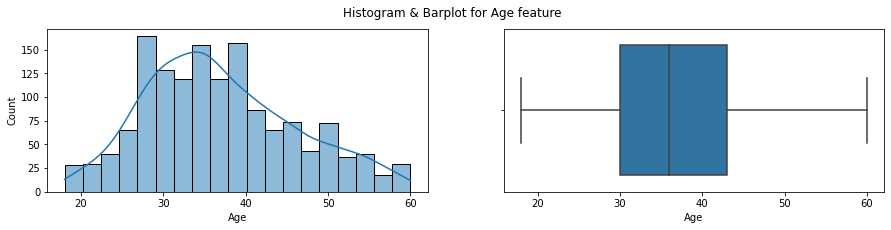

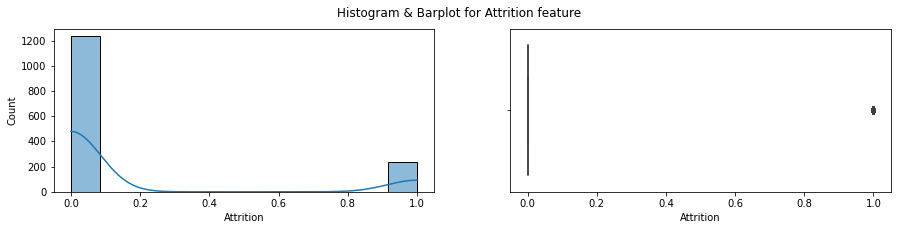

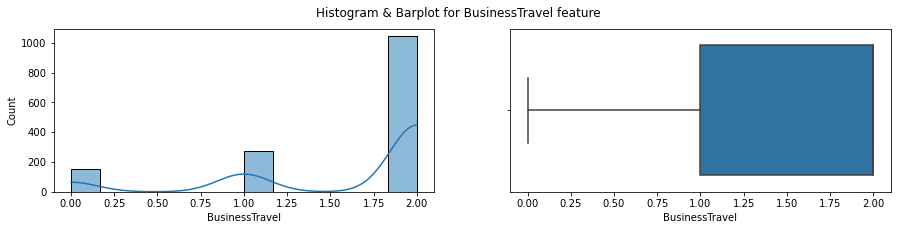

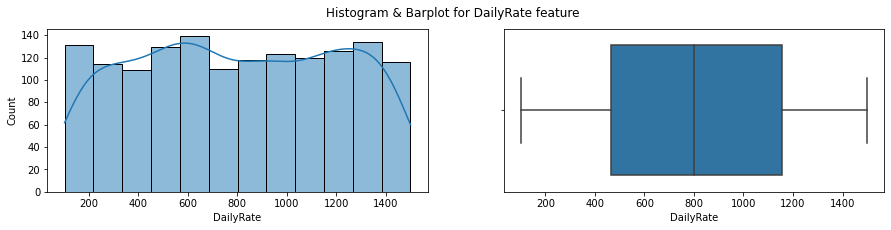

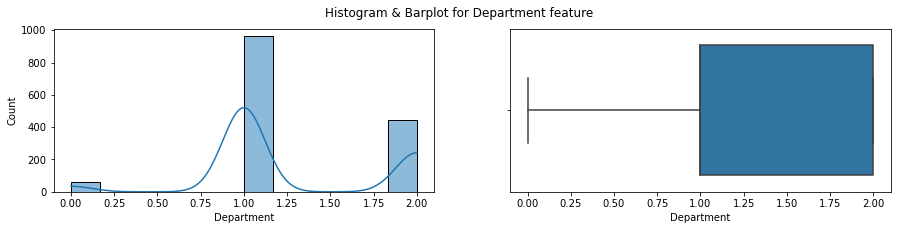

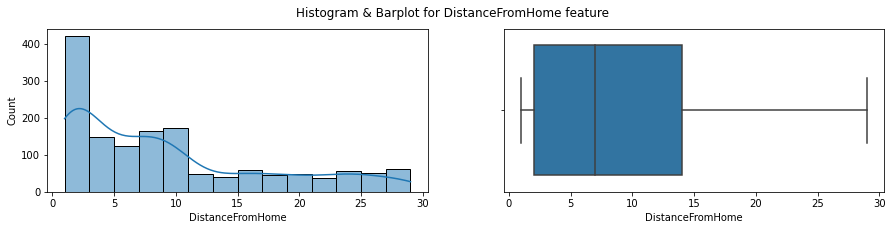

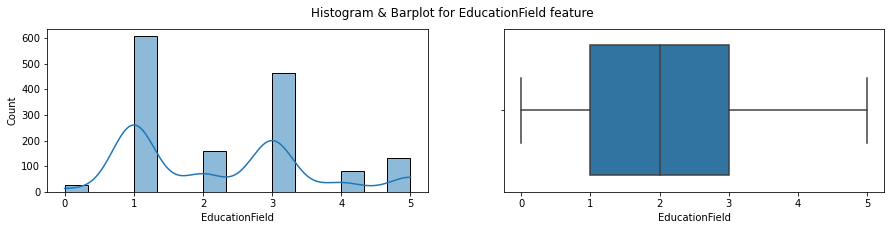

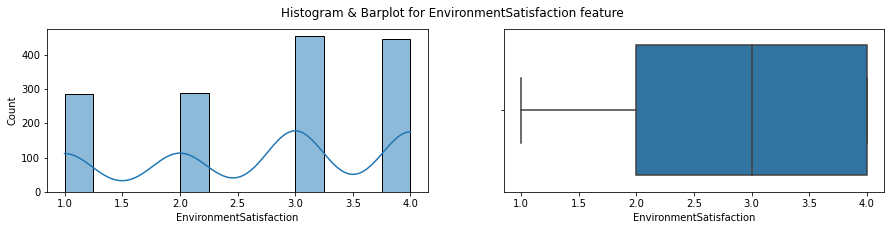

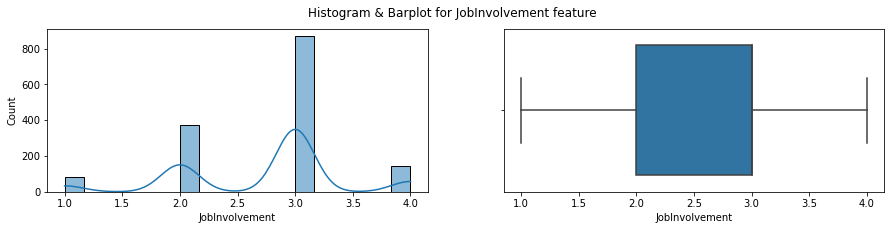

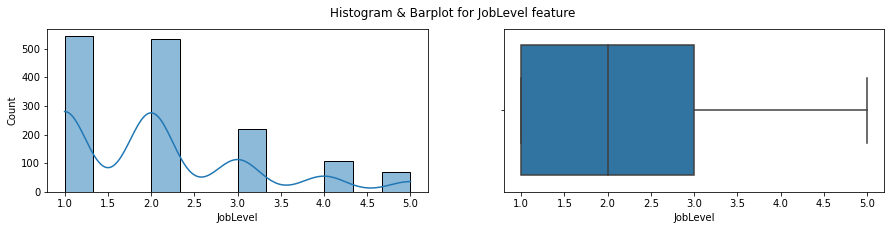

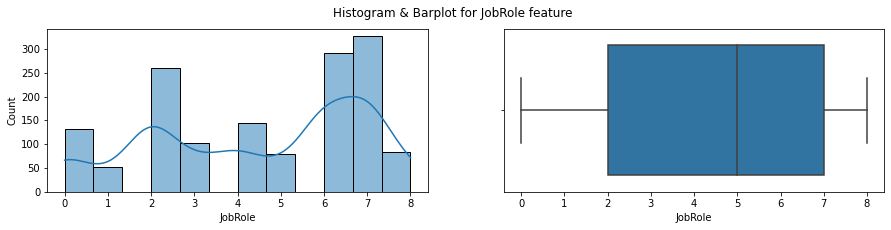

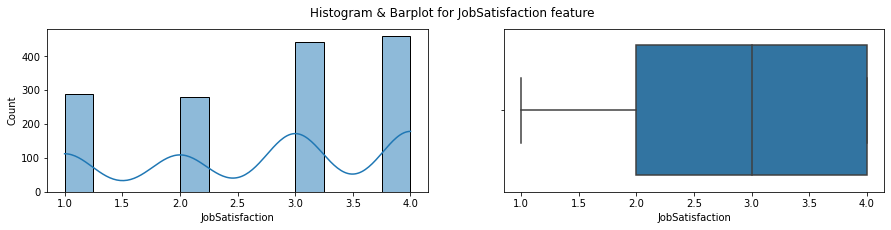

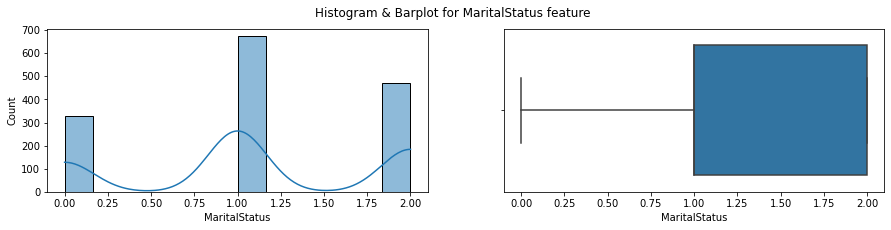

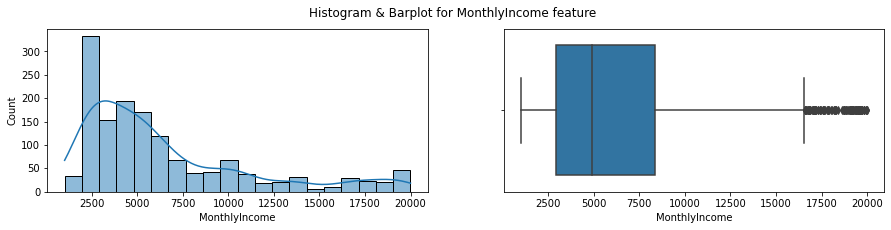

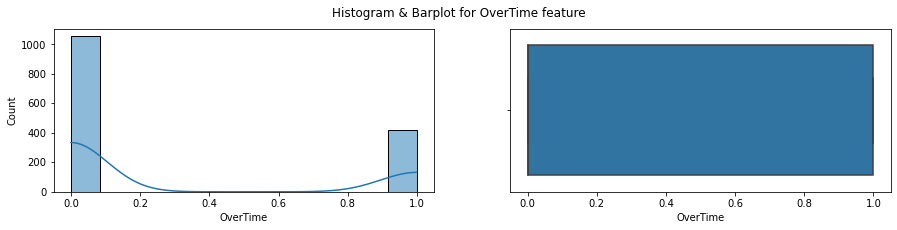

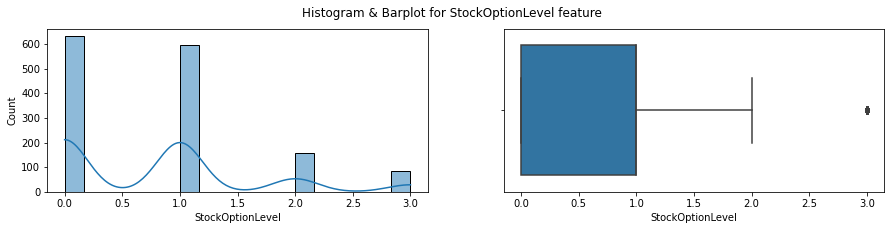

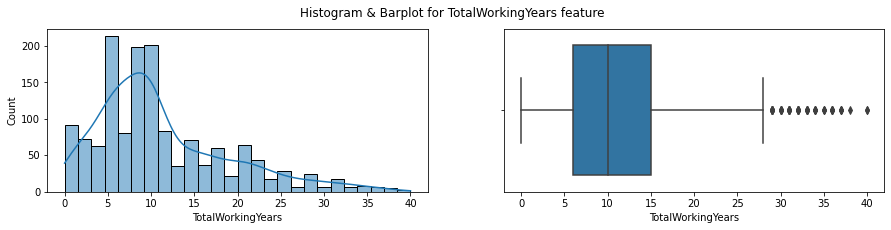

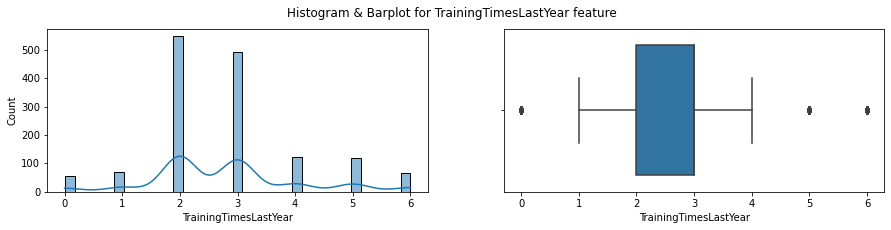

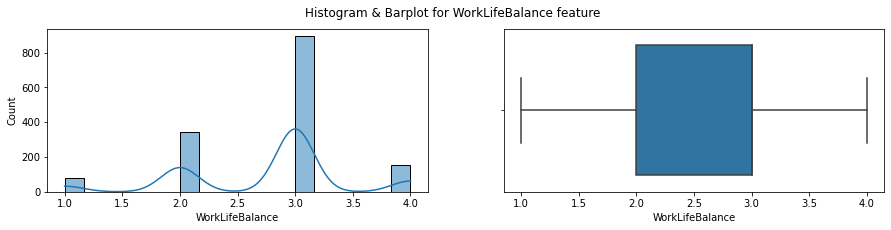

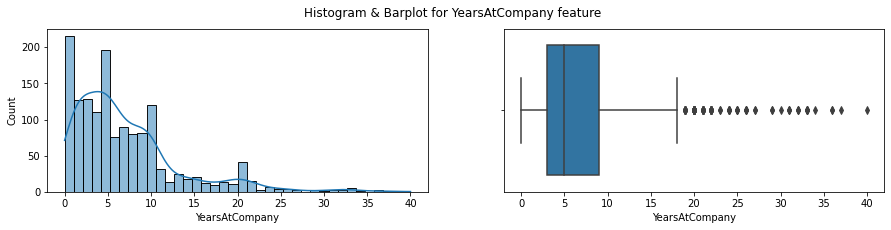

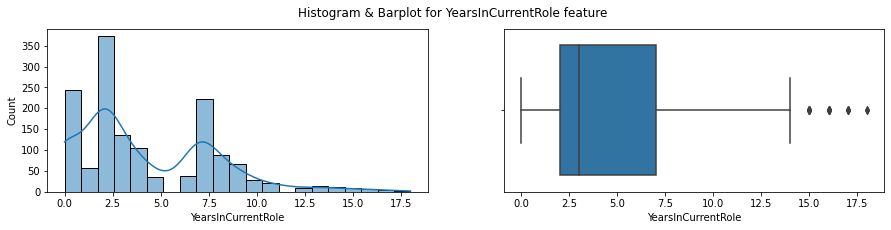

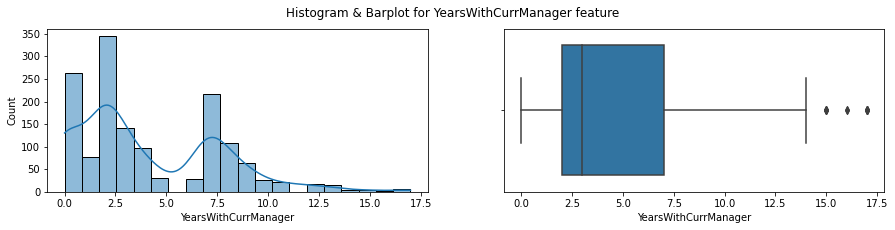

In [28]:
for i in df.columns:
    fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(15,3))
    plt.suptitle("Histogram & Barplot for {} feature".format(i), ha='center')
    sns.histplot(data=df,x=i,ax=ax[0],fill=True, kde=True)
    sns.boxplot(data=df,x=i,ax=ax[1])

In [29]:
# handle outliers
# fill the mode value in the Outliers.
def outliers(df):
    for col in df.columns:
        # 1st quartile
        Q1 = np.percentile(df[col],25)
        # 3rd quartile
        Q3 = np.percentile(df[col],75)
        # IQR
        IQR = Q3 - Q1
        # upper Bound
        upper = Q3 + 1.5*IQR
        # Lower bound
        lower = Q1-1.5*IQR
        # Count for Outliers before converting
        print('Outliers Before replacing Median',col,': ',df[col].loc[(df[col] > upper) | (df[col] < lower)].count())
        # replacing median in outliers
        df[col]= df[col].mask(df[col] > upper, df[col].mode())
        df[col]= df[col].mask(df[col] < lower, df[col].mode())

        print('Outliers After replacing Median',col,': ',df[col].loc[(df[col] > upper) | (df[col] < lower)].count(),'\n\n')

In [30]:
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [31]:
outliers(X)

Outliers Before replacing Median Age :  0
Outliers After replacing Median Age :  0 


Outliers Before replacing Median BusinessTravel :  0
Outliers After replacing Median BusinessTravel :  0 


Outliers Before replacing Median DailyRate :  0
Outliers After replacing Median DailyRate :  0 


Outliers Before replacing Median Department :  0
Outliers After replacing Median Department :  0 


Outliers Before replacing Median DistanceFromHome :  0
Outliers After replacing Median DistanceFromHome :  0 


Outliers Before replacing Median EducationField :  0
Outliers After replacing Median EducationField :  0 


Outliers Before replacing Median EnvironmentSatisfaction :  0
Outliers After replacing Median EnvironmentSatisfaction :  0 


Outliers Before replacing Median JobInvolvement :  0
Outliers After replacing Median JobInvolvement :  0 


Outliers Before replacing Median JobLevel :  0
Outliers After replacing Median JobLevel :  0 


Outliers Before replacing Median JobRole :  0
Outliers Aft

In [32]:
# Drop the Ouliers.
X.dropna(inplace=True)
X.shape

(996, 21)

In [56]:
y = y[:996]
y.shape

(996,)

# Barplot of target variable

<AxesSubplot:>

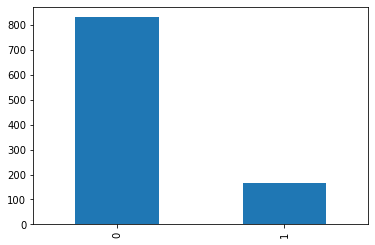

In [57]:
pd.value_counts(y).plot(kind="bar")

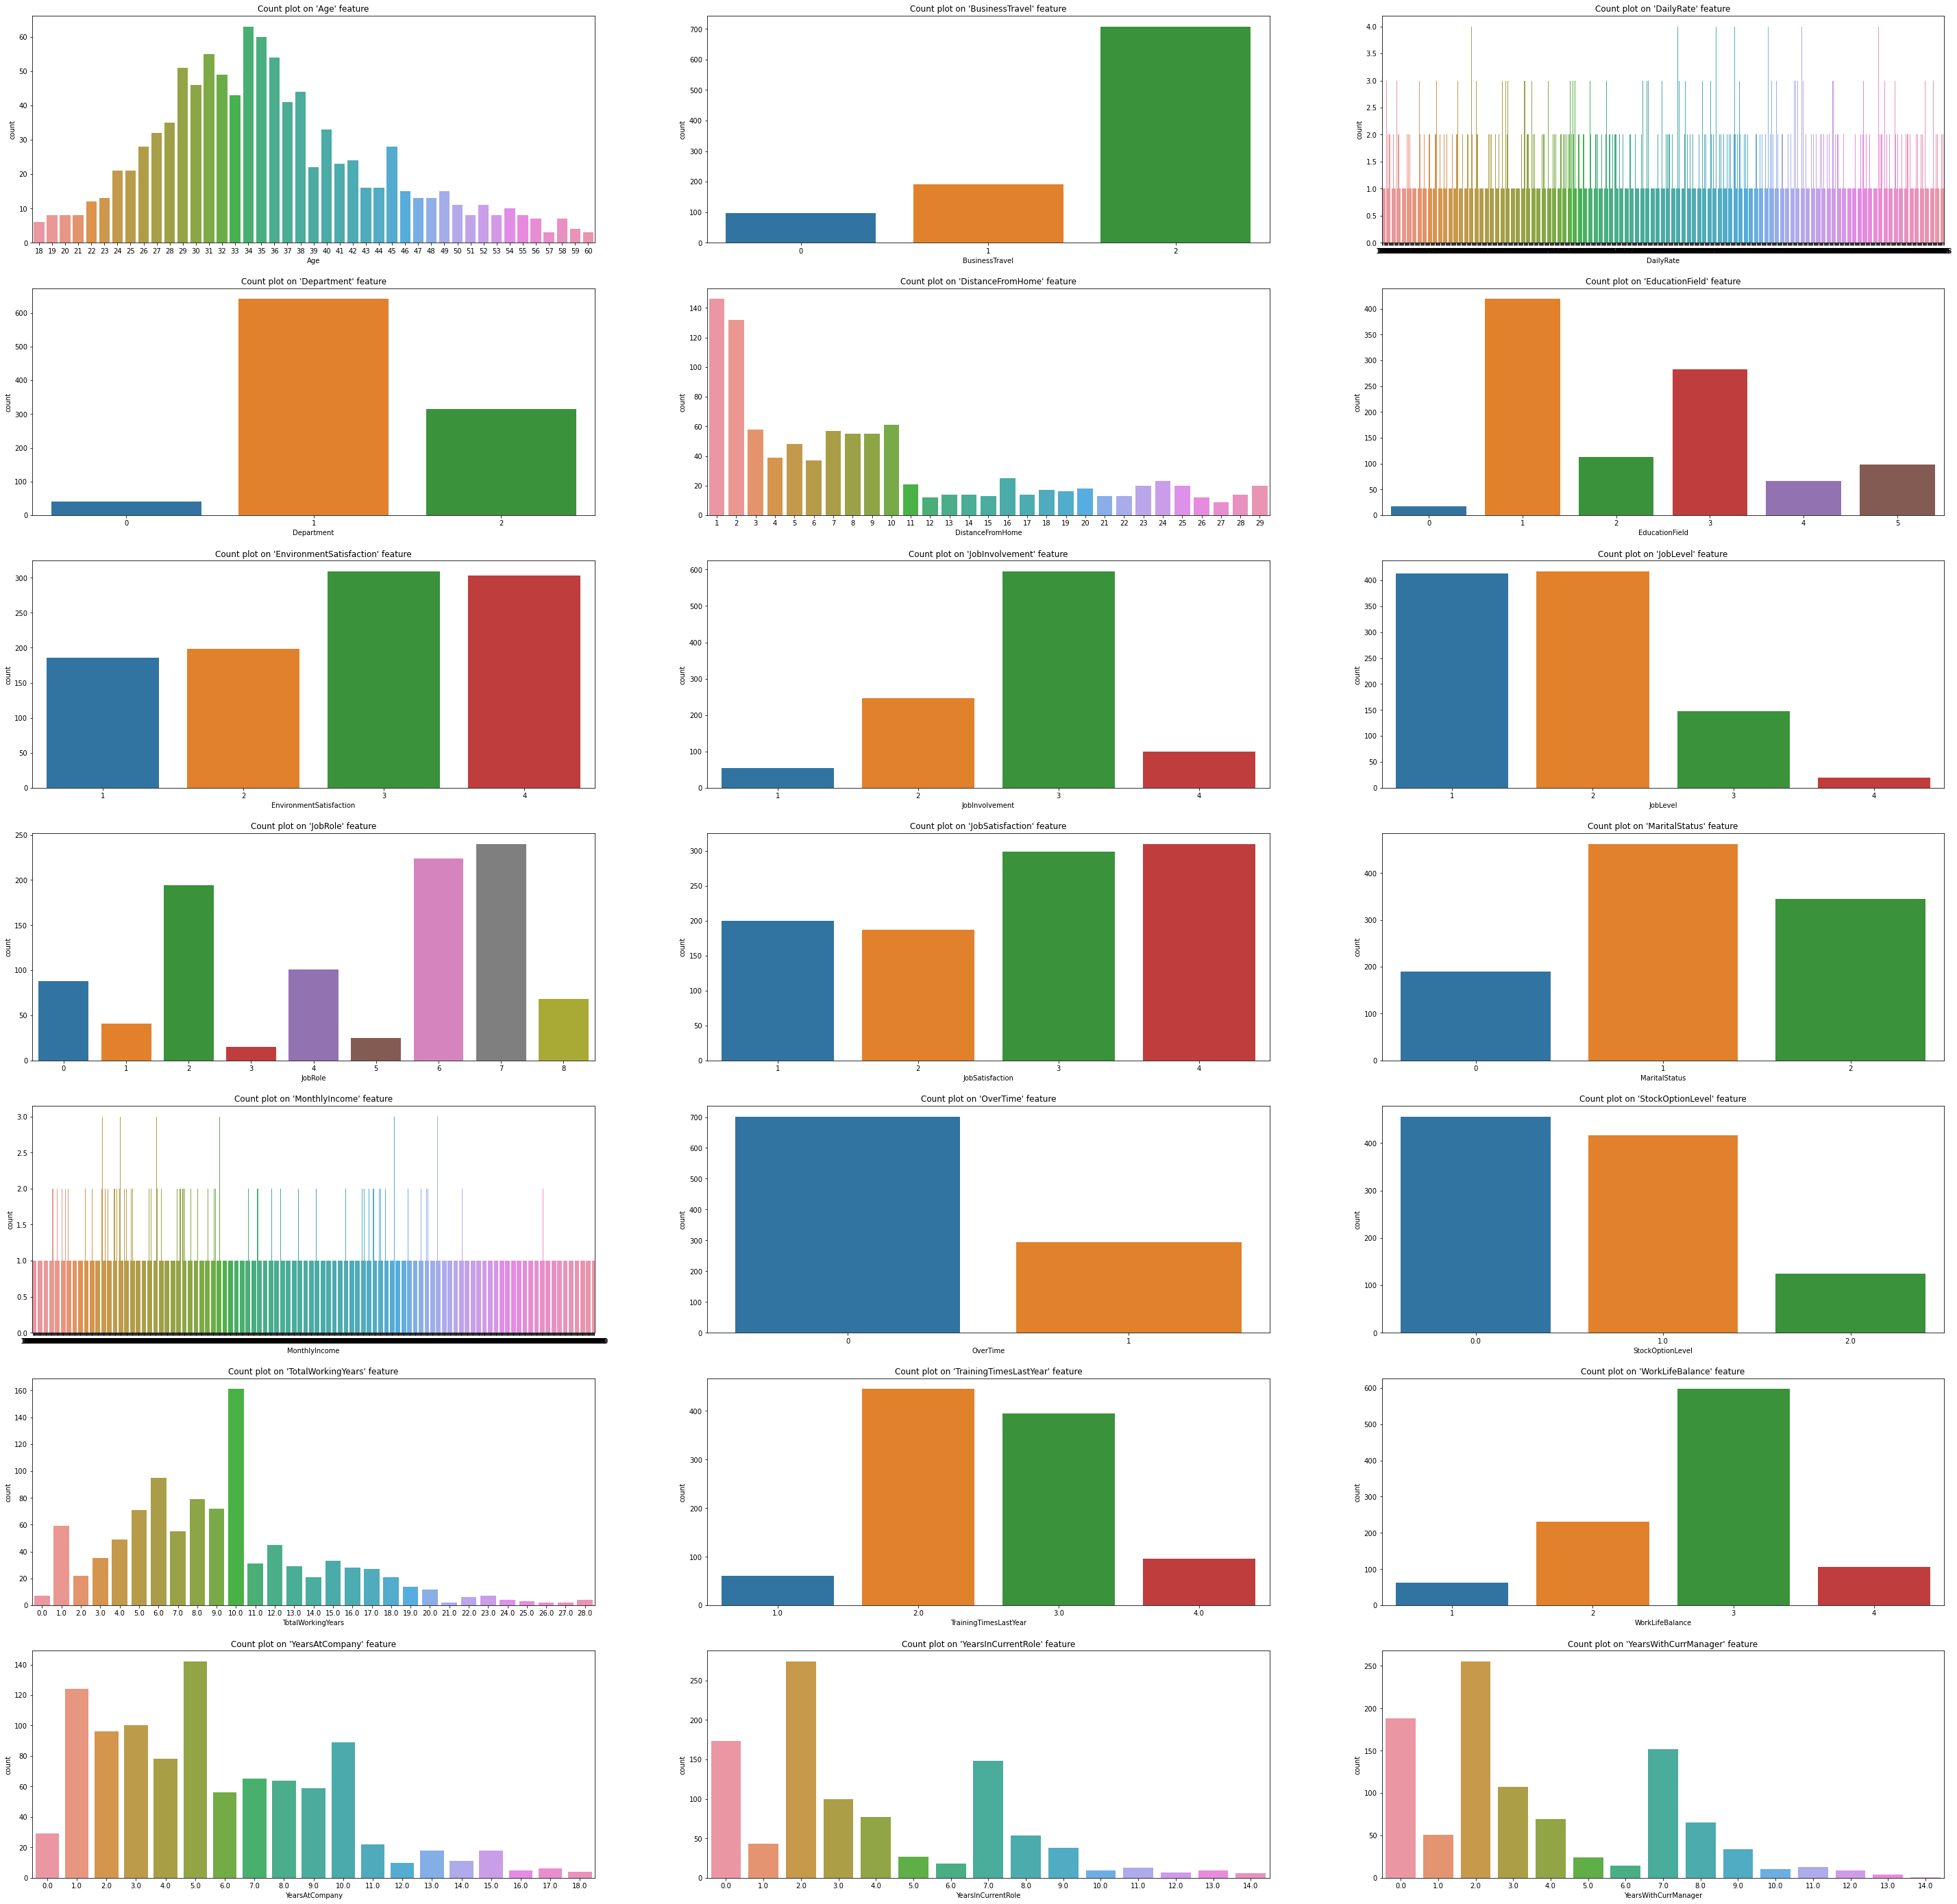

In [58]:
#cat=df.select_dtypes(exclude='object').columns.to_list()
fig, ax= plt.subplots(nrows=7, ncols=3, figsize=(50,50),)
ax=ax.flatten()
j=0
for i in X.columns:
    ax[j].set_title("Count plot on '{}' feature".format(i))
    sns.countplot(data=X, x=i, ax=ax[j])
    j=j+1

# Bivariate Analysis

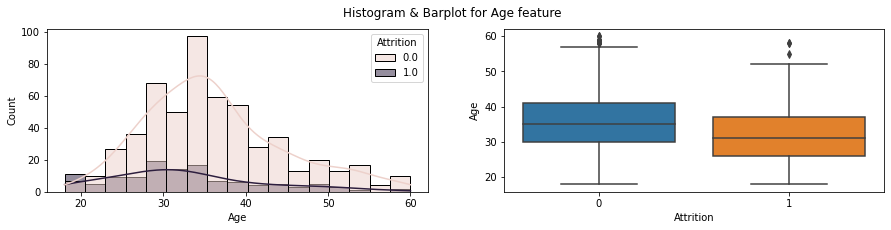

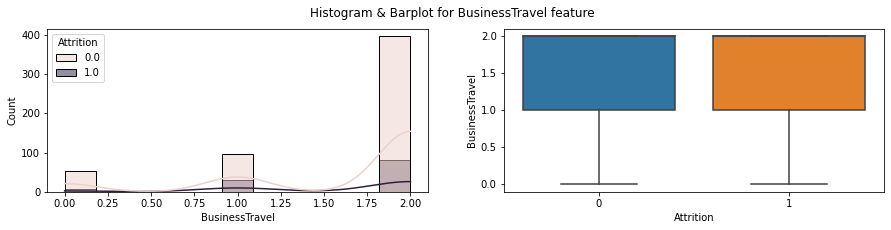

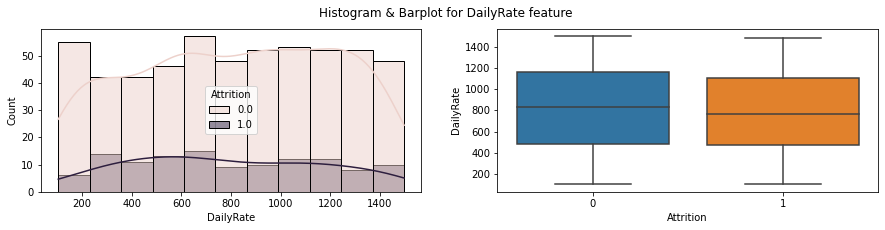

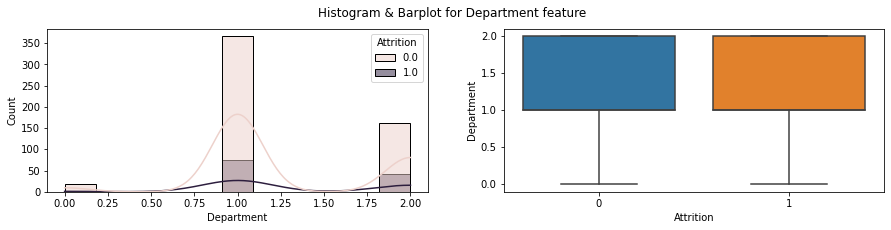

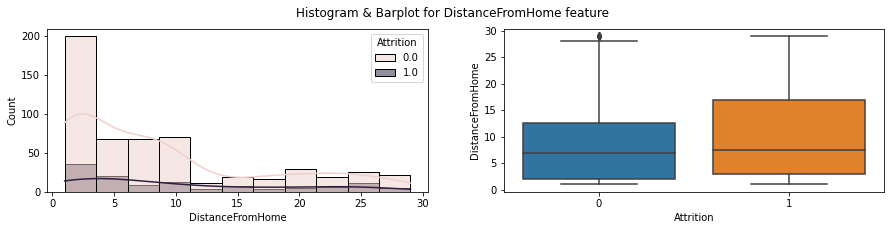

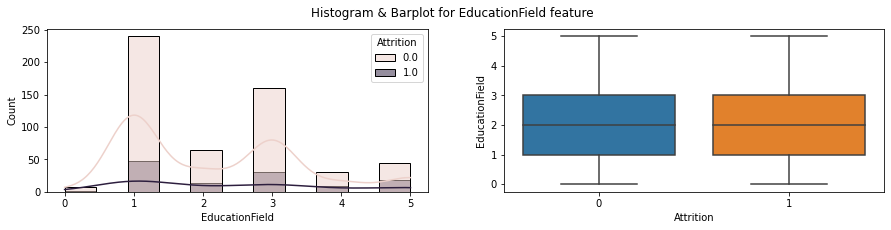

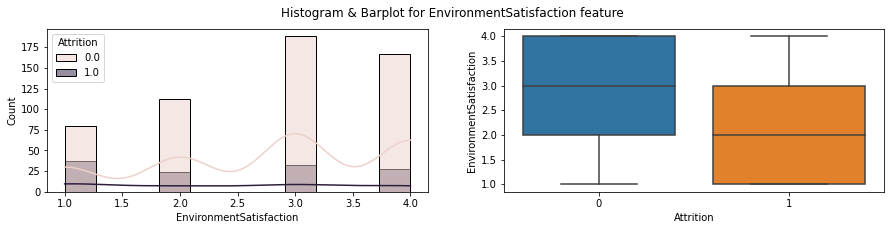

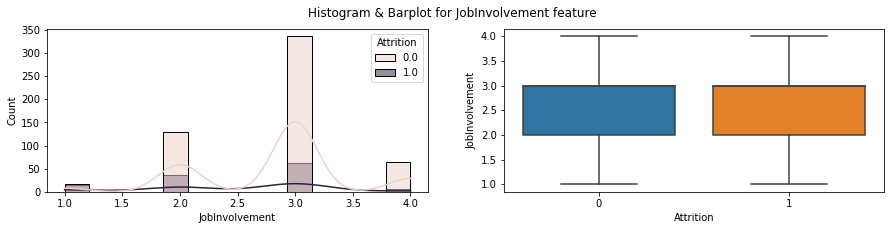

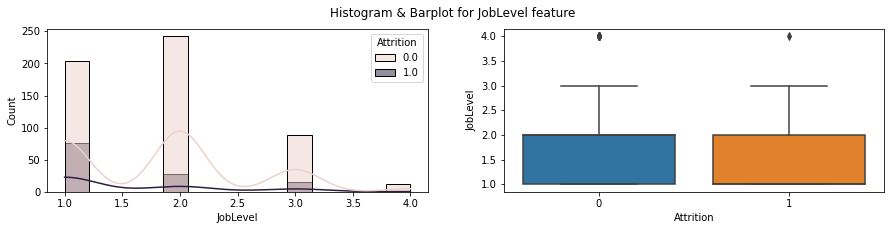

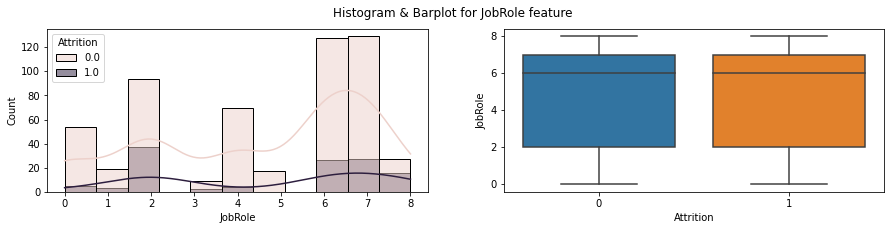

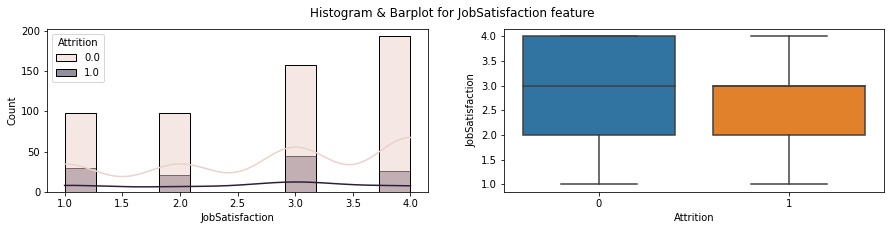

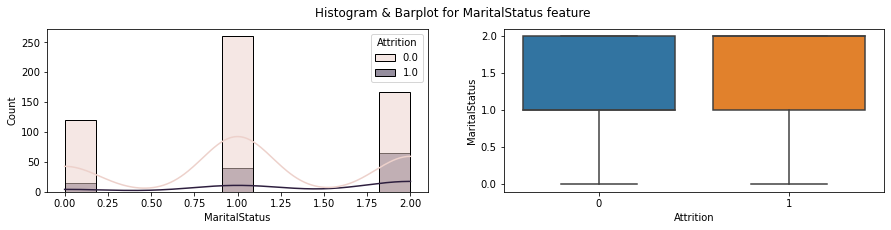

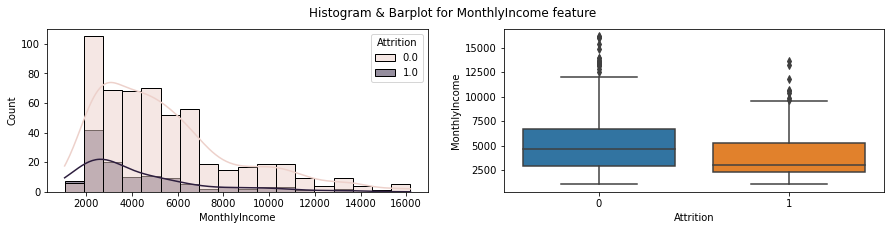

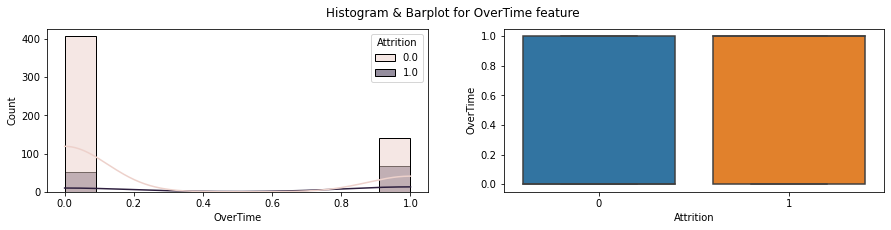

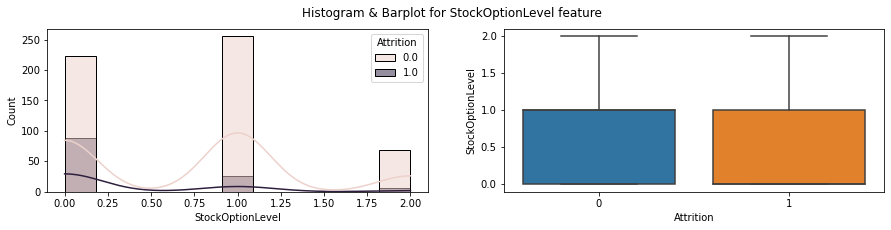

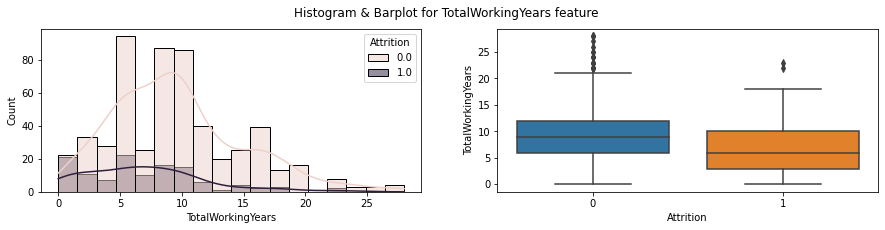

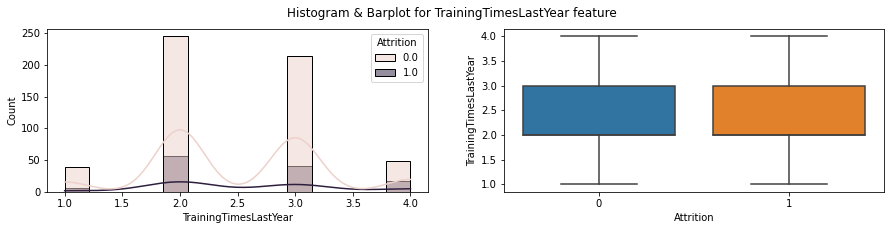

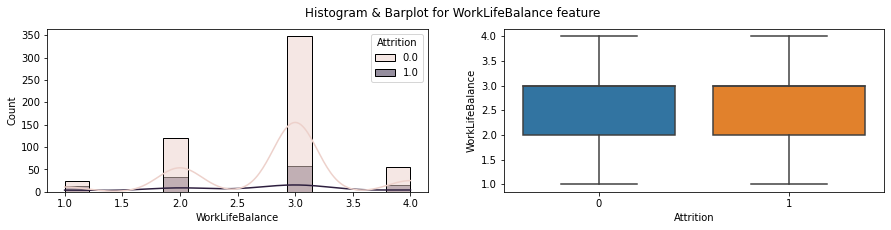

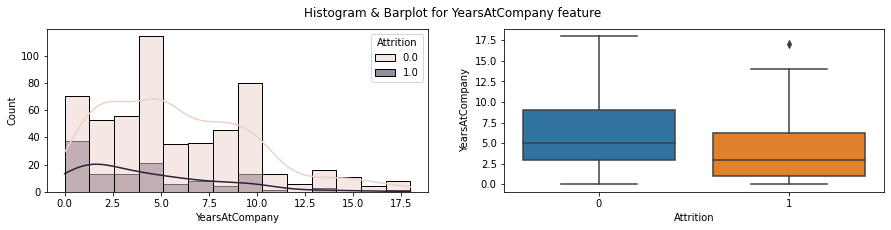

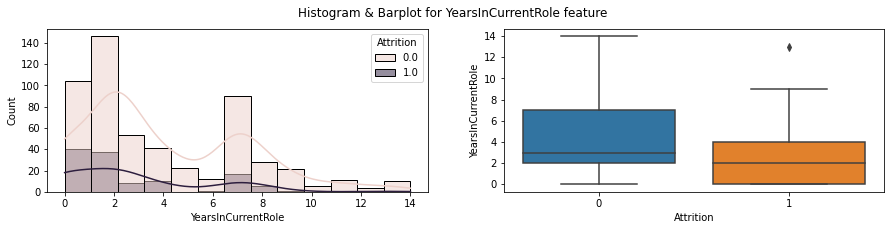

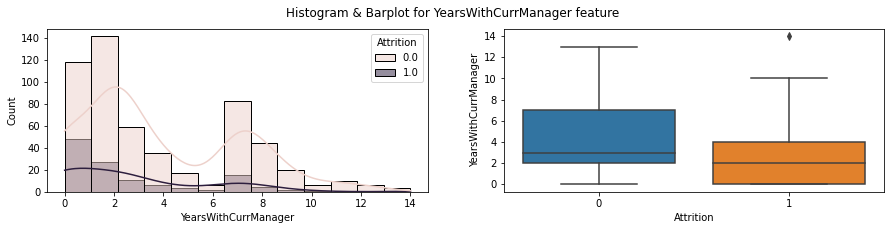

In [59]:
# num_cols = df.select_dtypes(exclude='object').columns.to_list()
for i in X.columns:
    fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(15,3))
    plt.suptitle("Histogram & Barplot for {} feature".format(i), ha='center' )
    sns.histplot(data=X,x=i,ax=ax[0],fill=True, kde=True, hue=y)
    sns.boxplot(x=y,ax=ax[1], y=i, data= X)

# Multivariate Analysis:

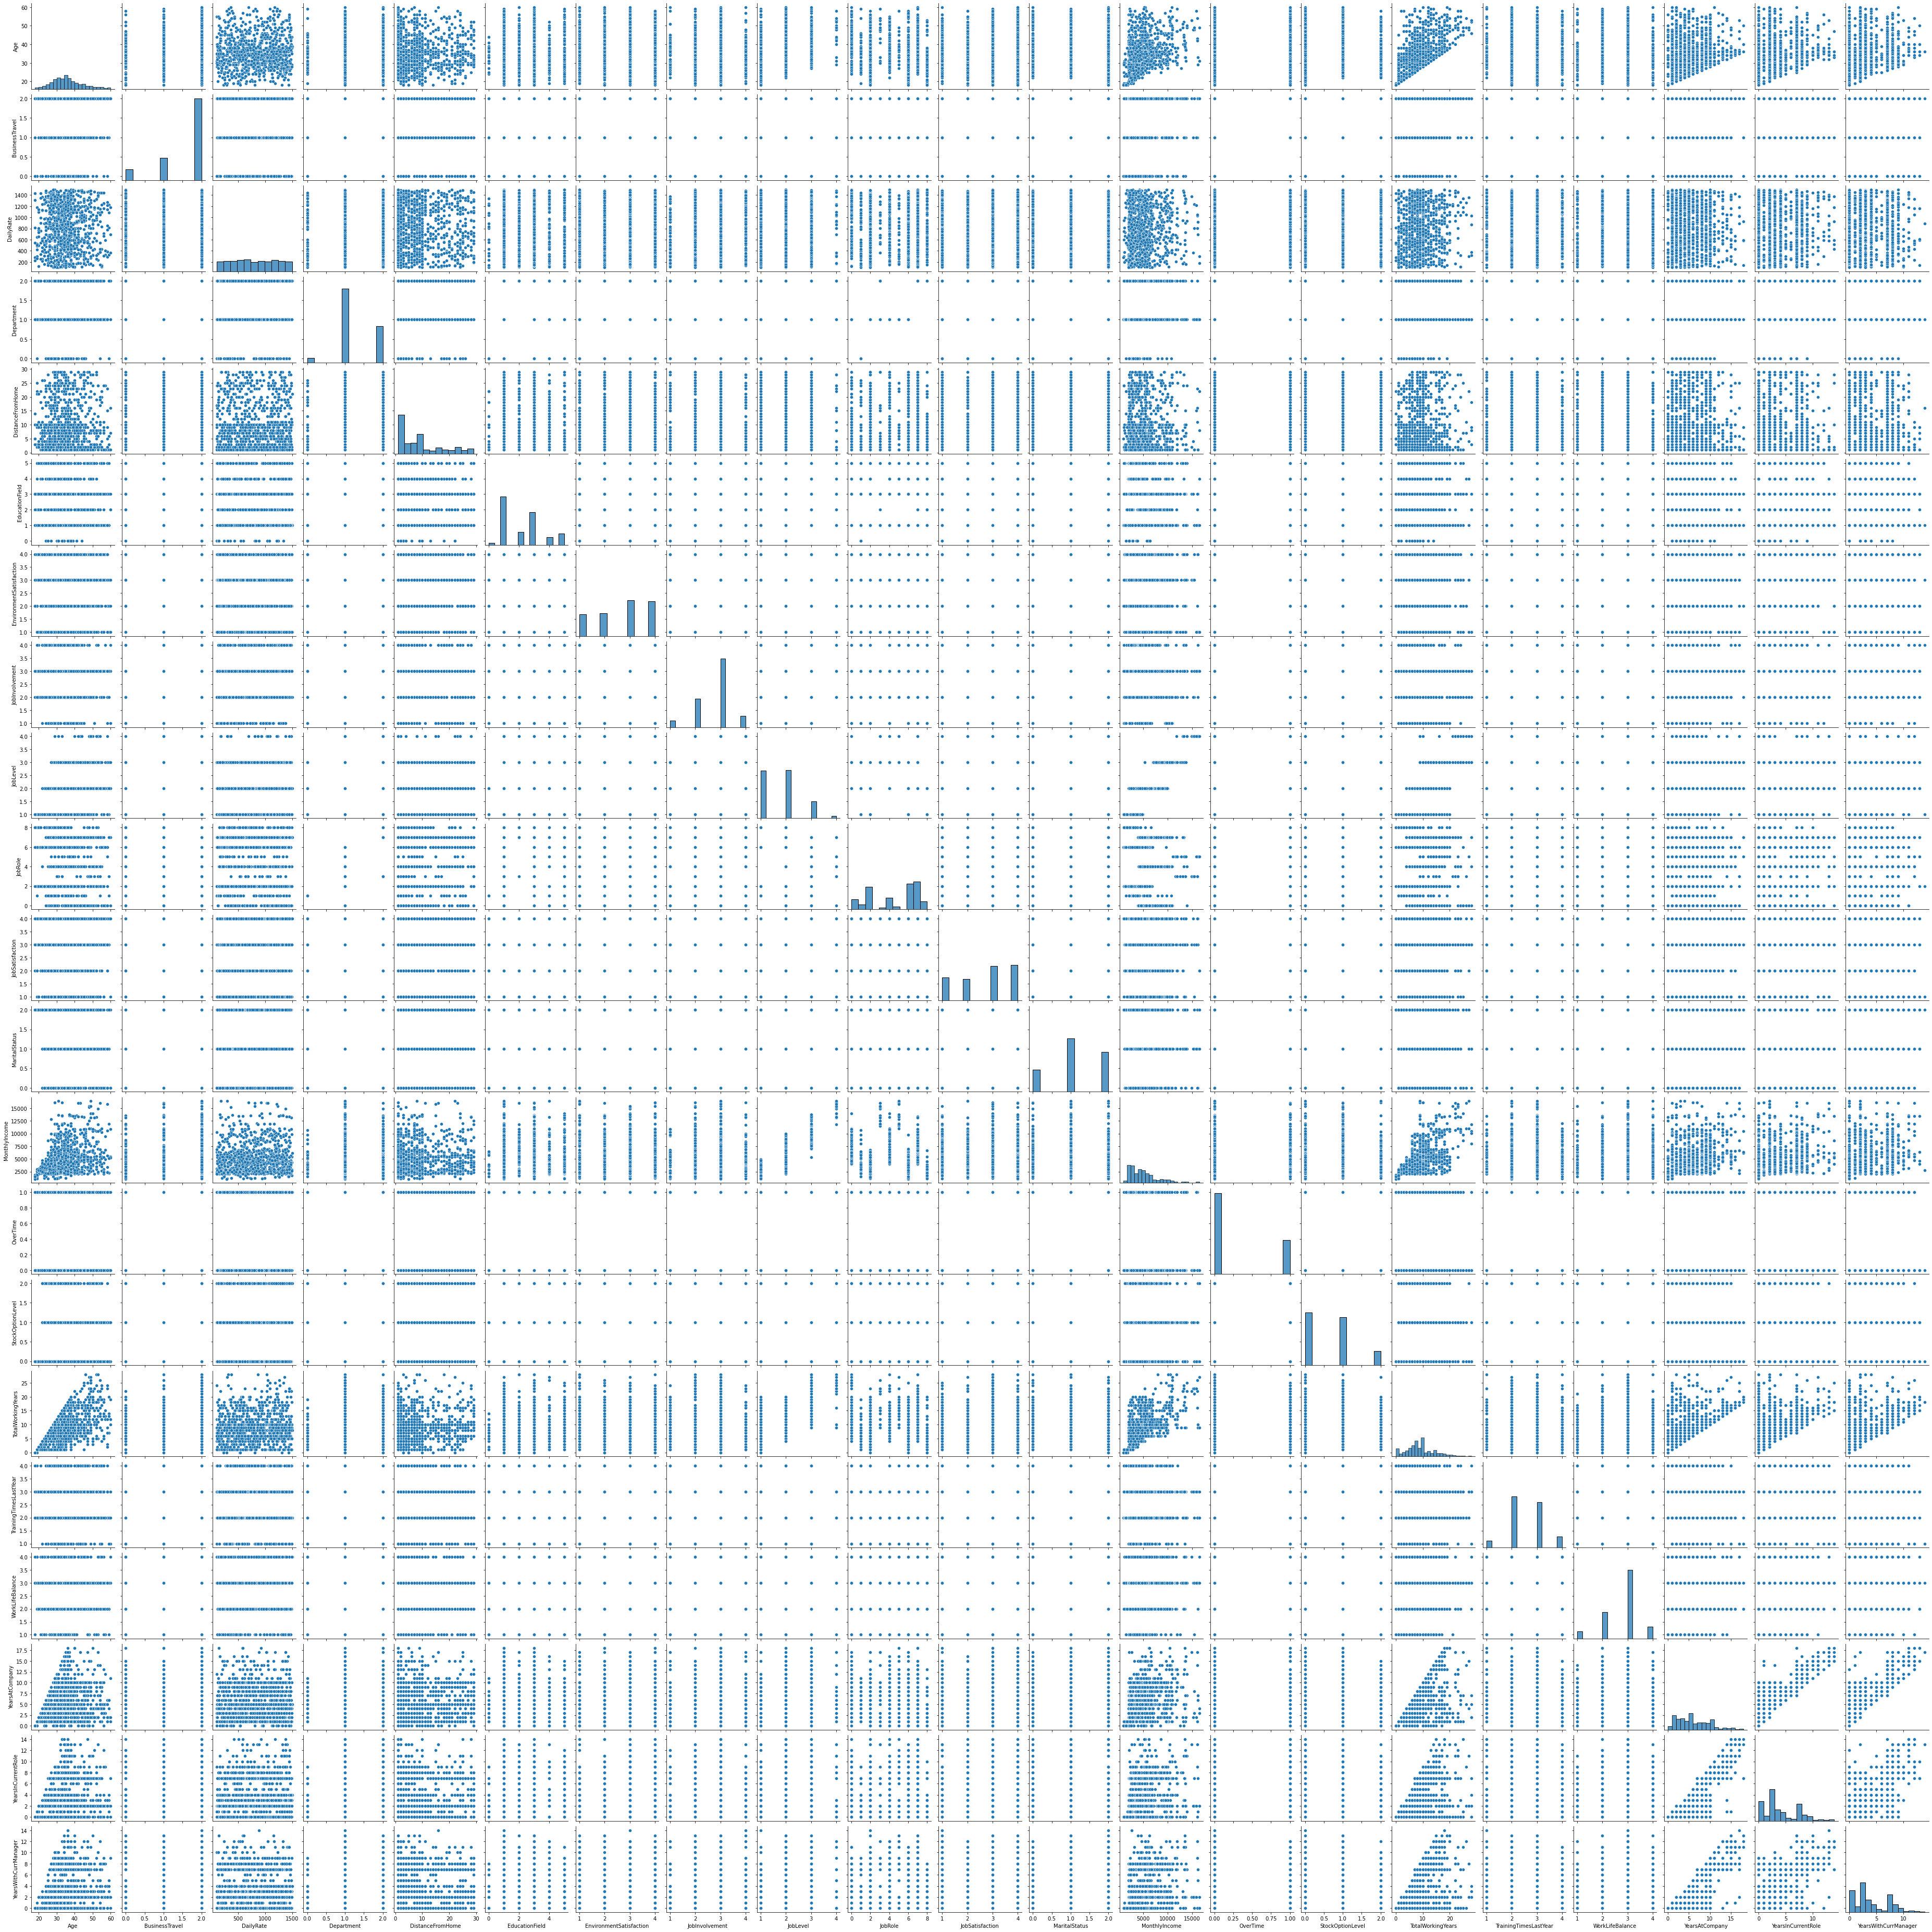

In [60]:
sns.pairplot(X)

In [61]:
X.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
Age,1.000000,0.008012,0.010012,-0.003628,0.020837,-0.025398,0.007763,0.027086,0.343486,-0.098466,...,-0.103409,0.318477,0.010113,0.079281,0.562433,0.067182,0.016247,0.129850,0.111774,0.099425
BusinessTravel,0.008012,1.000000,-0.027482,-0.022373,-0.040407,-0.009329,0.022664,-0.013998,-0.007810,-0.005857,...,0.011017,0.020333,0.014606,-0.015619,0.012457,0.041218,-0.014800,-0.037592,-0.033602,-0.055801
DailyRate,0.010012,-0.027482,1.000000,0.021606,-0.004436,0.034523,0.051454,0.060723,0.029418,-0.025293,...,-0.044200,0.037093,0.035518,0.021436,0.053333,-0.016413,-0.047737,0.017327,0.032235,0.001876
Department,-0.003628,-0.022373,0.021606,1.000000,0.002295,0.016433,-0.025840,-0.030171,0.226228,0.708530,...,0.032397,0.164940,0.022476,0.022062,0.026437,0.046828,0.026783,0.067523,0.088738,0.049618
DistanceFromHome,0.020837,-0.040407,-0.004436,0.002295,1.000000,-0.008060,-0.020718,0.029700,0.082839,-0.035379,...,-0.036887,0.050779,0.032832,0.077721,0.064675,-0.048485,-0.063801,0.029880,0.032519,0.026150
EducationField,-0.025398,-0.009329,0.034523,0.016433,-0.008060,1.000000,0.065578,-0.011120,-0.023475,0.034061,...,-0.001129,-0.002050,0.015236,0.000358,0.008674,0.052597,0.032538,0.001405,0.008023,0.036807
EnvironmentSatisfaction,0.007763,0.022664,0.051454,-0.025840,-0.020718,0.065578,1.000000,0.003707,-0.023101,-0.024335,...,-0.063601,-0.041306,0.036125,0.068723,-0.029799,0.047209,0.007980,0.046761,0.066378,0.031081
JobInvolvement,0.027086,-0.013998,0.060723,-0.030171,0.029700,-0.011120,0.003707,1.000000,-0.011226,0.010108,...,-0.038844,-0.029034,0.000487,0.061981,0.006543,0.031226,0.016640,0.039142,0.028492,0.059774
JobLevel,0.343486,-0.007810,0.029418,0.226228,0.082839,-0.023475,-0.023101,-0.011226,1.000000,-0.021550,...,-0.064700,0.893277,0.015241,0.066864,0.612432,-0.056590,0.077837,0.372057,0.329699,0.303022
JobRole,-0.098466,-0.005857,-0.025293,0.708530,-0.035379,0.034061,-0.024335,0.010108,-0.021550,1.000000,...,0.058217,-0.028527,0.021489,-0.006544,-0.107505,0.061524,0.021747,-0.010908,0.021474,-0.007741


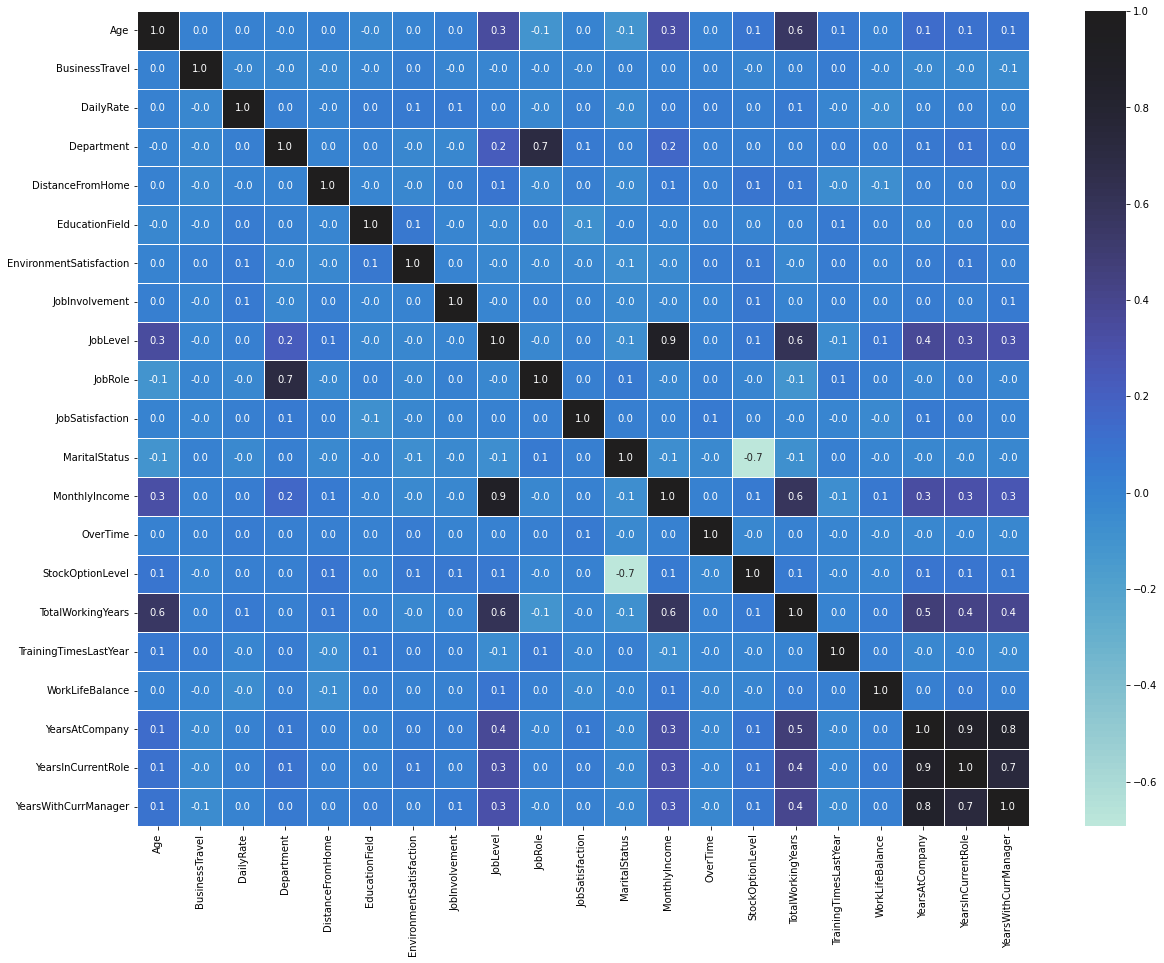

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(), annot=True, linewidth=0.5,fmt= '.1f',center = 1)
plt.show()

Comments:
We can observe from the heatmap about correlations within independent variables:

* (Job level and Monthly income), (YearsInCurrentRole and YearsAtCompany), () are highly correlated with each other (0.9)
* (YearsAtCompany and YearsWithCurrentManager) are also highly correlated with each other (0.8)
* (YearsInCurrentRole and YearsWithCurrentManager), (JobRole and Department) show significant correlation (0.7)

# Data pre-processing:

Perform train-test split:

In [63]:
print(X.shape)
print(y.shape)

(996, 21)
(996,)


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=101)

# Standardization:

In [65]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

# Decision Tree:

In [67]:
from sklearn.tree import DecisionTreeClassifier

model_dtree = DecisionTreeClassifier(criterion = 'gini', random_state=101)
model_dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=101)

In [68]:
print(model_dtree.score(x_train,y_train))
print(model_dtree.score(x_test,y_test))

1.0
0.7190635451505016


The scores of decision tree in training and testing implies the data is overfit.

# Decision Tree-Reducing over fitting (Regularization)

In [69]:
model_dtreeR = DecisionTreeClassifier(criterion= 'gini', max_depth = 3, random_state = 101)
model_dtreeR.fit(x_train,y_train)
print(model_dtreeR.score(x_train,y_train))
print(model_dtreeR.score(x_test,y_test))

0.8536585365853658
0.782608695652174


# RandomForest Classifier:

In [74]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(criterion='entropy', max_features='auto', max_depth = 5, random_state=101)
model_rf.fit(x_train, y_train)

print(model_rf.score(x_train,y_train))
print(model_rf.score(x_test,y_test))

0.8393113342898135
0.8193979933110368


The scores of Random Forest on training and testing datasets have performed quite well

# Ensemble Techniques:

In [75]:
# define a funtion which gives best Accuracy score.

def score(model):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    
    print('Train Accuracy: ', model.score(x_train, y_train))
    print('Test Accuracy: ', model.score(x_test, y_test))
    
    return predict

In [82]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


# make the bagging classifier model with best parameters
bgcl_best = BaggingClassifier(random_state=101,
                             base_estimator=model_dtree,
                             n_estimators=100,
                             max_samples=len(x_train),
                             bootstrap=True,
                             n_jobs=-1)



# make the AdaBoost classifier with best parameters
adcl_best = AdaBoostClassifier(random_state=101,
                              n_estimators=50,
                              learning_rate=1.0,
                              base_estimator=model_dtree)


# make gradient Boost Classifier with best parameters
gbcl_best = GradientBoostingClassifier(random_state=101,
                                      n_estimators=200,
                                      criterion='mse',
                                      loss='exponential',
                                      learning_rate=0.1,
                                      max_depth=3)

In [83]:
# score for Bagging
score(bgcl_best)

Train Accuracy:  0.8263988522238164
Test Accuracy:  0.7959866220735786


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
# score for AdaBoost
score(adcl_best)

Train Accuracy:  0.8393113342898135
Test Accuracy:  0.8193979933110368


array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
# score for GradientBoosting
score(gbcl_best)

Train Accuracy:  0.776183644189383
Test Accuracy:  0.7023411371237458


array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])